<a href="https://colab.research.google.com/github/RohitSen1235/DataAnalysisAndML/blob/main/Clustering_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline 
import seaborn as sns

from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!ls "/content/drive/My Drive/Ananth Swaminathan"

'01 - Fiverr workbook for Python App.xlsx'   modified_data.xlsx
 Clustering.ipynb			     pair_plot.png
'How to actually perform K.docx'	     Untitled0.ipynb


###**Creating a map of original Headers vs the modified simpler Headers**###

In [4]:
Columns={
    'Row_ID':'Row ID',
    'Respondant_ID':'Respondent ID',
    'WorkEx':'Work Experience in Years',
    'Age': 'Age',
    'Gender': 'Gender',
    'Location': 'Location',
    'Work_Status':'Work Status',
    'Marital_Status':'Marital Status',
    'Parental_status':'Parental_status',
    'Dependants':'Dependents (0, 1-2, 3-4, >=5)',
    'Income_security':'How secure is your current & future income from salaries, pension, other income etc?',
    'Investment_familiarity':'How familiar are you with investment matters?',
    'Current_state_of_life':'Which of the following statements describes the current stage of your life. (Select any one)',
    'brokerage':'Name your current brokerage (Multi-Select from list)',
    'N1_1':'When you are determining your investment objectives, please rank the objective "Increase financial security" on the following parameters [Importance as per you]',
    'N1_2':'When you are determining your investment objectives, please rank the objective "Increase financial security" on the following parameters [Satisfaction with your Current Brokerage]',
    'N1_3':'When you are determining your investment objectives, please rank the objective "Increase financial security" on the following parameters [Effort required with your Current Brokerage]',
    'N1_4':'WTP',
    'N1_5':'ATP',
    'N1_6':'$$$',
    'N2_1':'When you are determining your investment objectives, please rank the objective "Increase Liquidity" on the following parameters [Importance as per you]',
    'N2_2':'When you are determining your investment objectives, please rank the objective "Increase Liquidity" on the following parameters [Satisfaction with your Current Brokerage]',
    'N2_3':'When you are determining your investment objectives, please rank the objective "Increase Liquidity" on the following parameters [Effort required with your Current Brokerage]',
    'N3_1':'When you are determining your investment objectives, please rank the objective "Aid in Retirement planning (goal/age based retirement)" on the following parameters [Importance as per you]',
    'N3_2':'When you are determining your investment objectives, please rank the objective "Aid in Retirement planning (goal/age based retirement)" on the following parameters [Satisfaction with your Current Brokerage]',
    'N3_3':'When you are determining your investment objectives, please rank the objective "Aid in Retirement planning (goal/age based retirement)" on the following parameters [Effort required with your Current Brokerage]',
    'N4_1':'When you are determining the acceptable level of risk for an investment, please rank the objective "Minimize Risk" on the following parameters [Importance as per you]',
    'N4_2':'When you are determining the acceptable level of risk for an investment, please rank the objective "Minimize Risk" on the following parameters [Satisfaction with your Current Brokerage]',
    'N4_3':'When you are determining the acceptable level of risk for an investment, please rank the objective "Minimize Risk" on the following parameters [Effort required with your Current Brokerage]',
    'N5_1':'When you are determining the acceptable level of risk for an investment, please rank the objective "Ensure capital protection (to the extent possible)" on the following parameters [Importance as per you]',
    'N5_2':'When you are determining the acceptable level of risk for an investment, please rank the objective "Ensure capital protection (to the extent possible)" on the following parameters [Satisfaction with your Current Brokerage]',
    'N5_3':'When you are determining the acceptable level of risk for an investment, please rank the objective "Ensure capital protection (to the extent possible)" on the following parameters [Effort required with your Current Brokerage]',
    'N6_1':'When you are determining the acceptable level of risk for an investment, please rank the objective "Hedge risk" on the following parameters [Importance as per you]',
    'N6_2':'When you are determining the acceptable level of risk for an investment, please rank the objective "Hedge risk" on the following parameters [Satisfaction with your Current Brokerage]',
    'N6_3':'When you are determining the acceptable level of risk for an investment, please rank the objective "Hedge risk" on the following parameters [Effort required with your Current Brokerage]',
    'N7_1':'When you are determining the acceptable level of risk for an investment, please rank the objective "Generate higher returns - greater risk" on the following parameters [Importance as per you]',
    'N7_2':'When you are determining the acceptable level of risk for an investment, please rank the objective "Generate higher returns - greater risk" on the following parameters [Satisfaction with your Current Brokerage]',
    'N7_3':'When you are determining the acceptable level of risk for an investment, please rank the objective "Generate higher returns - greater risk" on the following parameters [Effort required with your Current Brokerage]',
    'N8_1':'When you are determining the acceptable level of risk for an investment, please rank the objective "Determine Risk - Explain the implications of risks to investors (via simulations)" on the following parameters [Importance as per you]',
    'N8_2':'When you are determining the acceptable level of risk for an investment, please rank the objective "Determine Risk - Explain the implications of risks to investors (via simulations)" on the following parameters [Satisfaction with your Current Brokerage]',
    'N8_3':'When you are determining the acceptable level of risk for an investment, please rank the objective "Determine Risk - Explain the implications of risks to investors (via simulations)" on the following parameters [Effort required with your Current Brokerage]',
    'N9_1':'When you are determining the acceptable level of risk for an investment, please rank the objective "Ensure trusted partner" on the following parameters [Importance as per you]',
    'N9_2':'When you are determining the acceptable level of risk for an investment, please rank the objective "Ensure trusted partner" on the following parameters [Satisfaction with your Current Brokerage]',
    'N9_3':'When you are determining the acceptable level of risk for an investment, please rank the objective "Ensure trusted partner" on the following parameters [Effort required with your Current Brokerage]',
    'N10_1':'When you are determining the acceptable level of risk for an investment, please rank the objective "Simulate past investments for comparisons" on the following parameters [Importance as per you]',
    'N10_2':'When you are determining the acceptable level of risk for an investment, please rank the objective "Simulate past investments for comparisons" on the following parameters [Satisfaction with your Current Brokerage]',
    'N10_3':'When you are determining the acceptable level of risk for an investment, please rank the objective "Simulate past investments for comparisons" on the following parameters [Effort required with your Current Brokerage]',
    'N11_1':'When you are determining the acceptable level of risk for an investment, please rank the objective "Increase advisory services via face to face (high touch)" on the following parameters [Importance as per you]',
    'N11_2':'When you are determining the acceptable level of risk for an investment, please rank the objective "Increase advisory services via face to face (high touch)" on the following parameters [Satisfaction with your Current Brokerage]',
    'N11_3':'When you are determining the acceptable level of risk for an investment, please rank the objective "Increase advisory services via face to face (high touch)" on the following parameters [Effort required with your Current Brokerage]',
}

###**Creating a list of all the possible options available for different columns**###

In [5]:
work_status_options=['Employed','Business','Retired']
Parental_status_options=['Yes','No']
Marital_status_options=['Yes','No']
Dependant_options=['0','1-2','3-4','>=5']
Income_security_option=['Not Secure','Somewhat Secure','Fairly Secure','Very Secure']
Investmene_familiarity=['Not at all familiar & feel uncomfortable','Very familier','Somewhat familier','Fairly familier','Not very familier']
Current_state_of_life_options=['I am ready to accumulate wealth','I am preparing for the future','I own home but maintain very small cash balance','I am at my peak','I am retired']
brokerage_options=['HDFC','ICICI','Kotak','Angel','Sharekhan','Motilal Oswal','Zerodha','Upstox','Groww','Other']
N_options=['very high','high','somewhat high(medium)','low','Not Applicable'] # applicable for al Ns


###**Mapping option lists to the Columsn names so**###

In [6]:
option_map={
    'Work_Status':work_status_options,
    'Marital_Status':Marital_status_options,
    'Parental_status':Parental_status_options,
    'Dependants':Dependant_options,
    'Income_security':Income_security_option,
    'Investment_familiarity':Investmene_familiarity,
    'Current_state_of_life':Current_state_of_life_options,
    'brokerage':brokerage_options,
    'N1_1':N_options,
    'N1_2':N_options,
    'N1_3':N_options,
    'N1_4':N_options,
    'N1_5':N_options,
    'N1_6':N_options,
    'N2_1':N_options,
    'N2_2':N_options,
    'N2_3':N_options,
    'N3_1':N_options,
    'N3_2':N_options,
    'N3_3':N_options,
    'N4_1':N_options,
    'N4_2':N_options,
    'N4_3':N_options,
    'N5_1':N_options,
    'N5_2':N_options,
    'N5_3':N_options,
    'N6_1':N_options,
    'N6_2':N_options,
    'N6_3':N_options,
    'N7_1':N_options,
    'N7_2':N_options,
    'N7_3':N_options,
    'N8_1':N_options,
    'N8_2':N_options,
    'N8_3':N_options,
    'N9_1':N_options,
    'N9_2':N_options,
    'N9_3':N_options,
    'N10_1':N_options,
    'N10_2':N_options,
    'N10_3':N_options,
    'N11_1':N_options,
    'N11_2':N_options,
    'N11_3':N_options,
}

###**Loading the data**###

In [7]:
raw_data=pd.read_excel("/content/drive/My Drive/Ananth Swaminathan/modified_data.xlsx")
raw_data.drop(['Unnamed: 0'],inplace=True,axis=1)
raw_data.loc[len(raw_data)-1,'Work_Status']="Employed"
raw_data

,Row_ID,Respondant_ID,WorkEx,Age,Gender,Location,Work_Status,Marital_Status,Parental_status,Dependants,...,N8_3,N9_1,N9_2,N9_3,N10_1,N10_2,N10_3,N11_1,N11_2,N11_3
0,1.0,R-1,11-15,37.0,Male,Mumbai,Employed,Yes,Yes,0.0,...,High,Very High,Medium,High,High,High,Low,Medium,Medium,Low
1,2.0,R-2,16-20,40.0,Male,Kolkatta,Business,Yes,Yes,1-2,...,Medium,High,Medium,Medium,High,Medium,High,High,Medium,Medium
2,3.0,R-3,6-10,35.0,Male,Bangalore,Business,No,No,3-4,...,Not Applicable,Very High,Medium,Medium,Very High,Low,Low,Very High,Medium,Medium
3,4.0,R-4,21-25,54.0,Male,Chennai,Business,No,No,0,...,Medium,High,High,Low,High,High,Medium,High,High,Medium
4,5.0,R-5,16-20,40.0,Male,Ahmedabad,Business,Yes,No,>=5,...,Medium,Very High,Very High,Medium,High,High,Medium,Very High,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,R-96,26-30,54.0,Female,Surat,Retired,No,Yes,>=5,...,very high,very high,low,Not Applicable,high,Not Applicable,Not Applicable,Not Applicable,Not Applicable,low
96,97.0,R-97,6-10,36.0,Male,Chennai,Business,Yes,Yes,0,...,somewhat high(medium),Not Applicable,Not Applicable,high,somewhat high(medium),high,somewhat high(medium),low,very high,Not Applicable
97,98.0,R-98,6-10,31.0,Male,Bangalore,Employed,Yes,Yes,3-4,...,very high,high,Not Applicable,very high,low,very high,high,Not Applicable,low,very high
98,99.0,R-99,26-30,57.0,Male,Chennai,Retired,Yes,Yes,1-2,...,Not Applicable,Not Applicable,high,Not Applicable,somewhat high(medium),very high,low,high,high,high


In [8]:
for col in ['N1_1','N1_2','N1_3','N2_1','N2_2','N2_3','N3_1','N3_3','N4_1','N4_2','N4_3','N5_1','N5_2','N5_3','N6_1','N6_2','N6_3','N7_1','N7_2','N7_3','N8_3','N9_1','N9_2','N9_3','N10_1','N10_2','N10_3','N11_1','N11_2','N11_3']:
    raw_data[col]=raw_data[col].apply(str.lower)

In [9]:
raw_data

,Row_ID,Respondant_ID,WorkEx,Age,Gender,Location,Work_Status,Marital_Status,Parental_status,Dependants,...,N8_3,N9_1,N9_2,N9_3,N10_1,N10_2,N10_3,N11_1,N11_2,N11_3
0,1.0,R-1,11-15,37.0,Male,Mumbai,Employed,Yes,Yes,0.0,...,high,very high,medium,high,high,high,low,medium,medium,low
1,2.0,R-2,16-20,40.0,Male,Kolkatta,Business,Yes,Yes,1-2,...,medium,high,medium,medium,high,medium,high,high,medium,medium
2,3.0,R-3,6-10,35.0,Male,Bangalore,Business,No,No,3-4,...,not applicable,very high,medium,medium,very high,low,low,very high,medium,medium
3,4.0,R-4,21-25,54.0,Male,Chennai,Business,No,No,0,...,medium,high,high,low,high,high,medium,high,high,medium
4,5.0,R-5,16-20,40.0,Male,Ahmedabad,Business,Yes,No,>=5,...,medium,very high,very high,medium,high,high,medium,very high,high,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,R-96,26-30,54.0,Female,Surat,Retired,No,Yes,>=5,...,very high,very high,low,not applicable,high,not applicable,not applicable,not applicable,not applicable,low
96,97.0,R-97,6-10,36.0,Male,Chennai,Business,Yes,Yes,0,...,somewhat high(medium),not applicable,not applicable,high,somewhat high(medium),high,somewhat high(medium),low,very high,not applicable
97,98.0,R-98,6-10,31.0,Male,Bangalore,Employed,Yes,Yes,3-4,...,very high,high,not applicable,very high,low,very high,high,not applicable,low,very high
98,99.0,R-99,26-30,57.0,Male,Chennai,Retired,Yes,Yes,1-2,...,not applicable,not applicable,high,not applicable,somewhat high(medium),very high,low,high,high,high


###**Information stats about the data**###
**better to understand before starting the analysis**

In [10]:
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Row_ID                  100 non-null    float64
 1   Respondant_ID           100 non-null    object 
 2   WorkEx                  100 non-null    object 
 3   Age                     100 non-null    float64
 4   Gender                  100 non-null    object 
 5   Location                100 non-null    object 
 6   Work_Status             100 non-null    object 
 7   Marital_Status          100 non-null    object 
 8   Parental_status         100 non-null    object 
 9   Dependants              100 non-null    object 
 10  Income_security         100 non-null    object 
 11  Investment_familiarity  100 non-null    object 
 12  Current_state_of_life   100 non-null    object 
 13  brokerage               100 non-null    object 
 14  N1_1                    100 non-null    obj

###**Converting the Categorical data into numerical dat for further analysis**###

In [11]:
from operator import index
raw_data.drop(['N1_4','N1_5','N1_6'],inplace=True,axis=1)
df=raw_data.iloc[:,0:14]
df.drop(['Respondant_ID'], axis=1, inplace=True) # dropping columns without meaning

for col in df.columns:
  df[col]=pd.Categorical(df[col]).codes

# ID=df['Row_ID']
attributes=df
survey_params=raw_data.iloc[:,14:]
attributes

,Row_ID,WorkEx,Age,Gender,Location,Work_Status,Marital_Status,Parental_status,Dependants,Income_security,Investment_familiarity,Current_state_of_life,brokerage
0,0,1,11,1,11,1,1,1,1,0,0,3,4
1,1,2,14,1,9,0,1,1,2,6,7,0,8
2,2,5,9,1,1,0,0,0,3,4,4,6,7
3,3,3,27,1,2,0,0,0,0,2,2,2,1
4,4,2,14,1,0,0,1,0,4,5,6,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,4,27,0,13,2,0,1,4,0,1,2,2
96,96,5,10,1,2,0,1,1,0,5,1,5,4
97,97,5,6,1,1,1,1,1,3,1,6,5,8
98,98,4,29,1,2,2,1,1,2,3,3,3,1


In [12]:
survey_params['Row_ID']=df['Row_ID']
survey_params

,N1_1,N1_2,N1_3,N2_1,N2_2,N2_3,N3_1,N3_2,N3_3,N4_1,...,N9_1,N9_2,N9_3,N10_1,N10_2,N10_3,N11_1,N11_2,N11_3,Row_ID
0,very high,very high,very high,very high,medium,high,very high,Medium,high,very high,...,very high,medium,high,high,high,low,medium,medium,low,0
1,high,high,medium,high,medium,medium,high,Medium,medium,low,...,high,medium,medium,high,medium,high,high,medium,medium,1
2,very high,low,medium,very high,low,low,high,Low,low,very high,...,very high,medium,medium,very high,low,low,very high,medium,medium,2
3,high,medium,medium,low,high,low,high,Medium,high,high,...,high,high,low,high,high,medium,high,high,medium,3
4,very high,medium,very high,medium,high,medium,very high,Medium,very high,high,...,very high,very high,medium,high,high,medium,very high,high,medium,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,very high,not applicable,high,low,very high,high,low,high,high,not applicable,...,very high,low,not applicable,high,not applicable,not applicable,not applicable,not applicable,low,95
96,somewhat high(medium),very high,very high,very high,somewhat high(medium),low,high,high,somewhat high(medium),low,...,not applicable,not applicable,high,somewhat high(medium),high,somewhat high(medium),low,very high,not applicable,96
97,very high,high,low,low,somewhat high(medium),very high,high,somewhat high(medium),very high,high,...,high,not applicable,very high,low,very high,high,not applicable,low,very high,97
98,not applicable,not applicable,high,low,high,somewhat high(medium),high,somewhat high(medium),high,somewhat high(medium),...,not applicable,high,not applicable,somewhat high(medium),very high,low,high,high,high,98


###**creatign a pair plot to visualize the data**###
####***we can gather a rough idea about the number of clusters present based on the number of gaussian peaks***####

####**NOTE:** ***This takes a lot of time so dont expect to run this multiple times***####

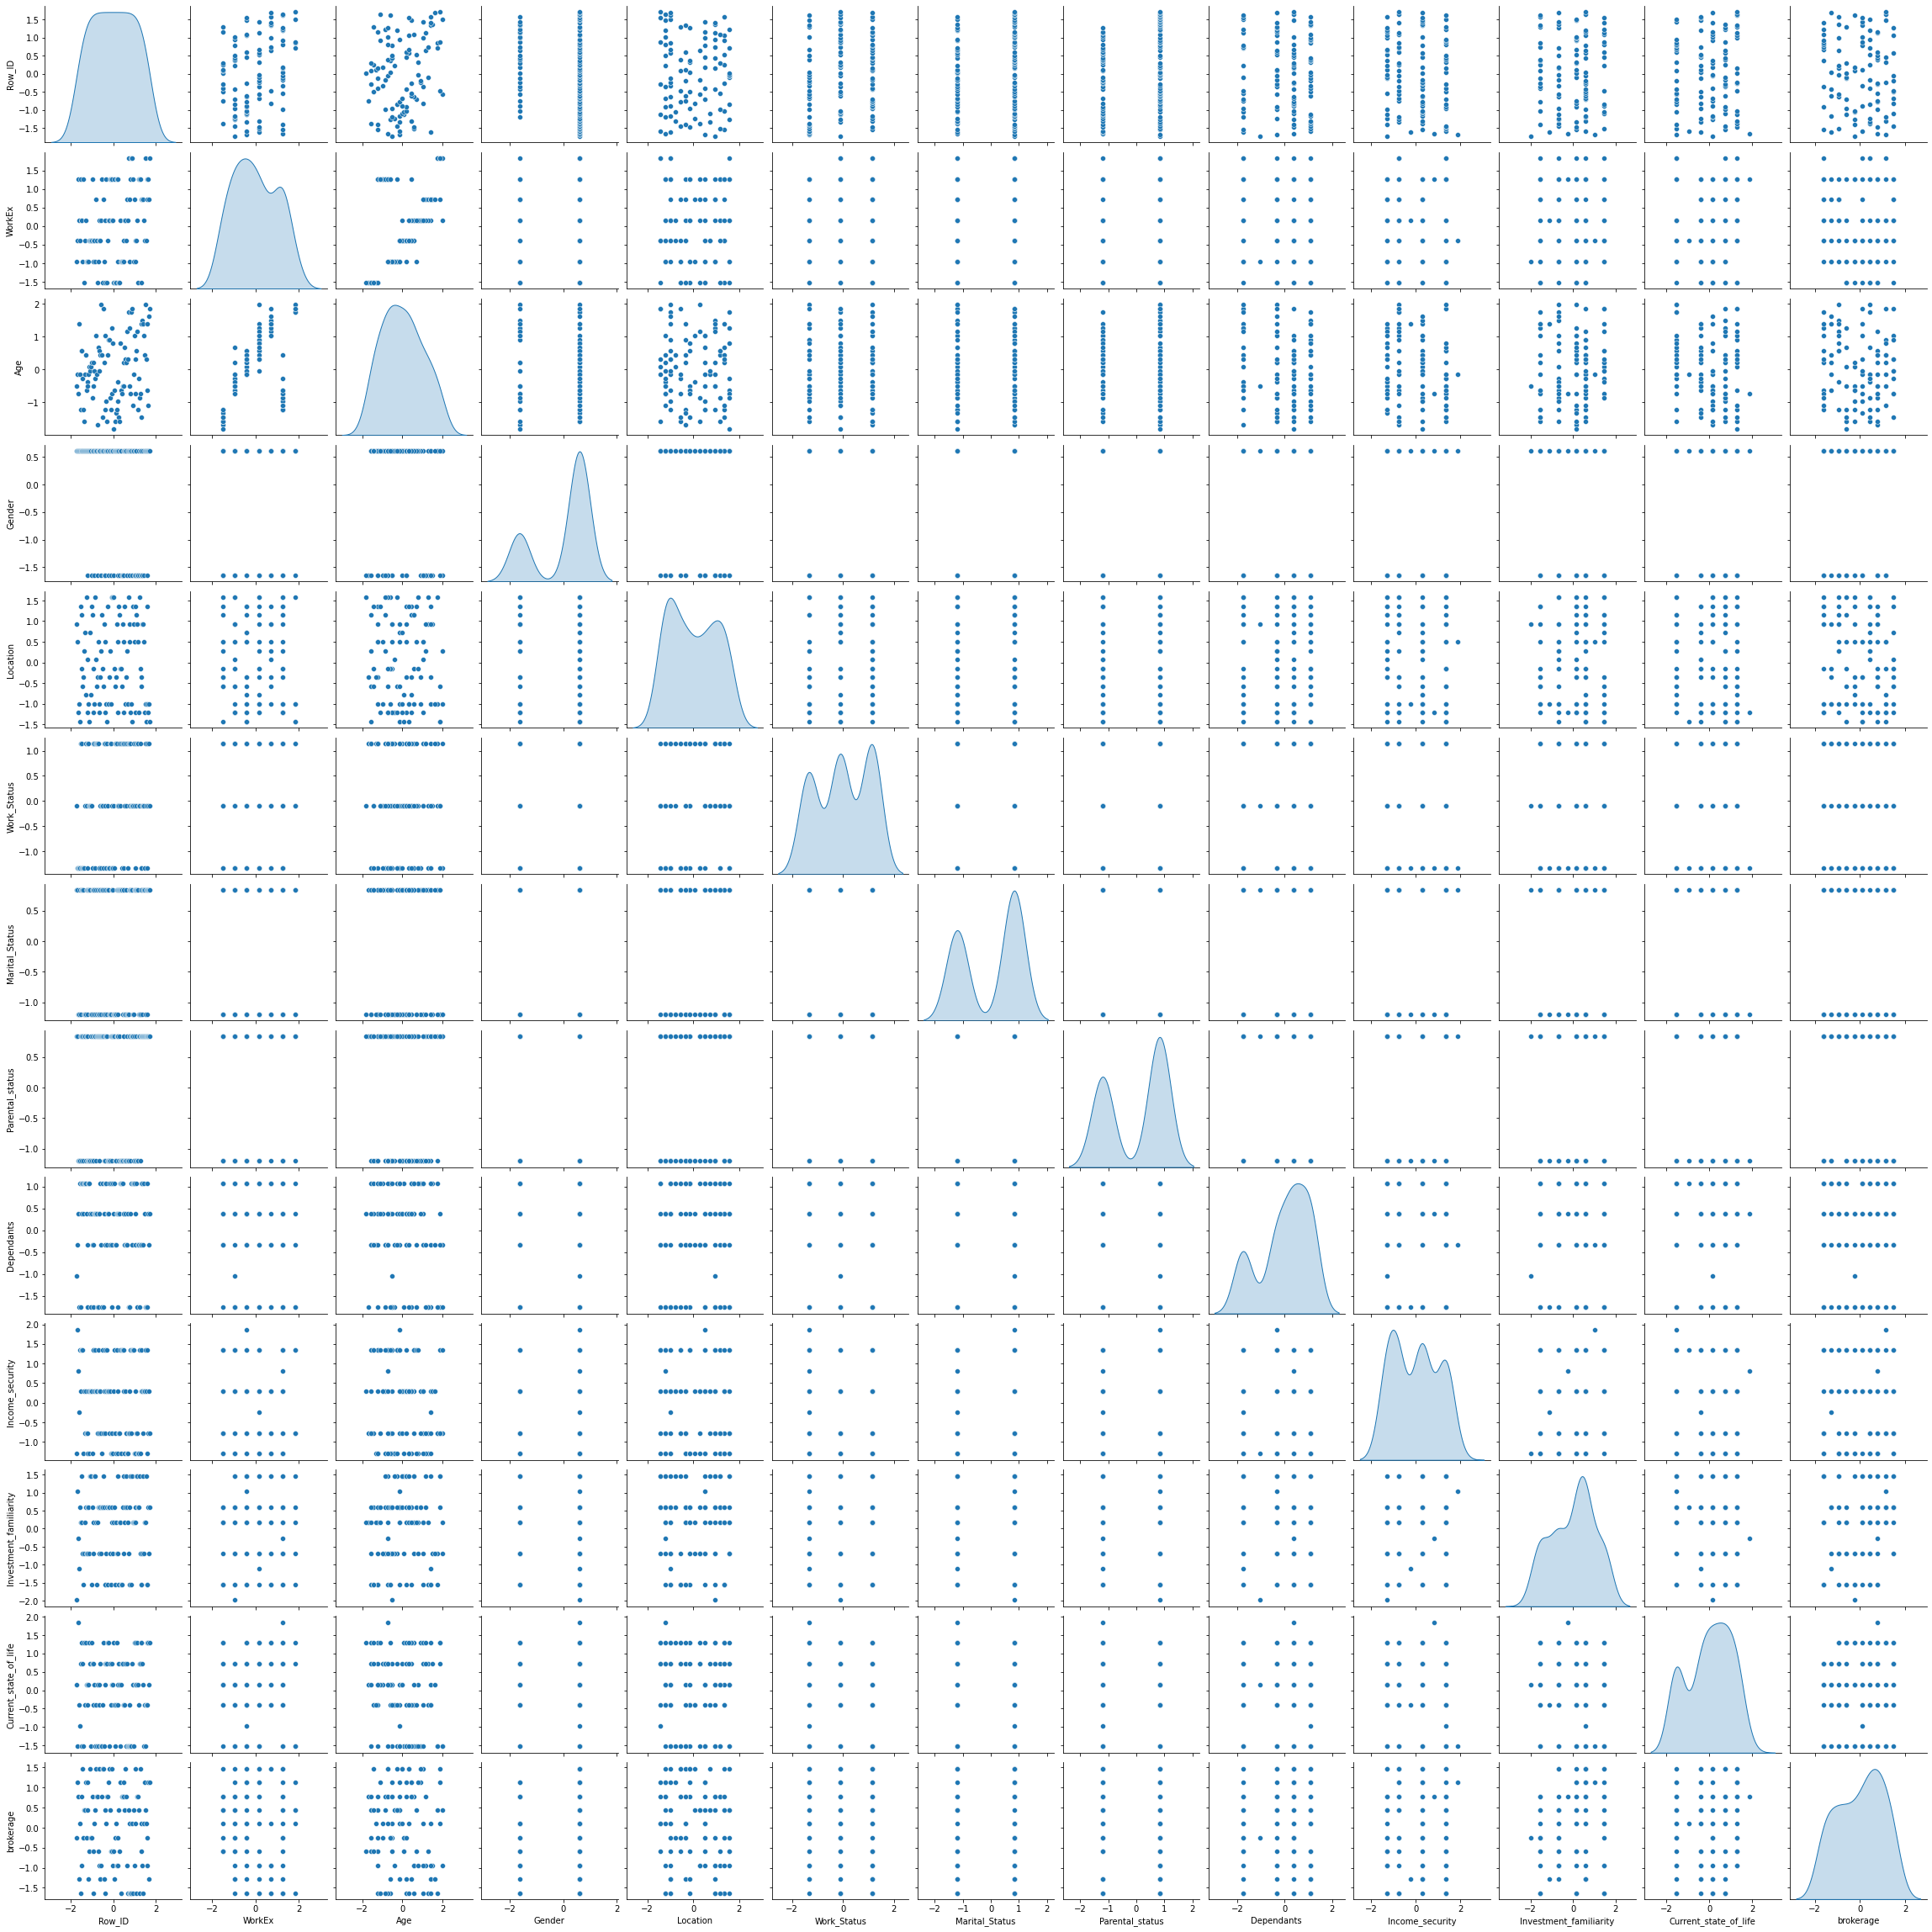

In [13]:
attr_scaled=attributes.apply(zscore)
sns.pairplot(attr_scaled,diag_kind='kde')

###**The diagonal Elements show that there may be 2 or 3 clusters**###
####***However there may be multidimentional interactions that can not be visualized in this plot***####

####***Performing the Elbow test to make sure***####

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

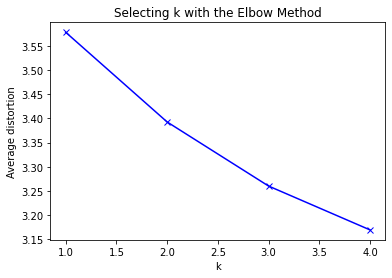

In [14]:
from scipy.spatial.distance import cdist
clusters=range(1,5)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(attr_scaled)
    prediction=model.predict(attr_scaled)
    meanDistortions.append(sum(np.min(cdist(attr_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / attr_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

###**Elbow Test Suggests there are 2 clusters**###
####***Going ahead with assumption of 2 clusters***#### 

In [15]:
model=KMeans(3)
model.fit(attr_scaled)
prediction=model.predict(attr_scaled)

#Append the prediction 
attributes["GROUP"] = prediction
attr_scaled["GROUP"] = prediction
print("Groups Assigned : \n")


Clusters = attributes.groupby(['GROUP'])
Clusters.mean()

Groups Assigned : 



,Row_ID,WorkEx,Age,Gender,Location,Work_Status,Marital_Status,Parental_status,Dependants,Income_security,Investment_familiarity,Current_state_of_life,brokerage
GROUP,,,,,,,,,,,,,
0,43.187500,1.468750,9.000000,0.750000,8.500000,1.656250,0.437500,0.500000,2.375,2.437500,3.50000,2.937500,4.656250
1,34.000000,2.406250,14.968750,0.812500,4.125000,0.718750,0.781250,0.437500,3.125,3.312500,5.53125,2.437500,6.156250
2,68.888889,4.111111,21.194444,0.638889,7.305556,0.888889,0.555556,0.805556,2.000,1.722222,4.75000,2.777778,3.527778


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b2d112450>,
      dtype=object)

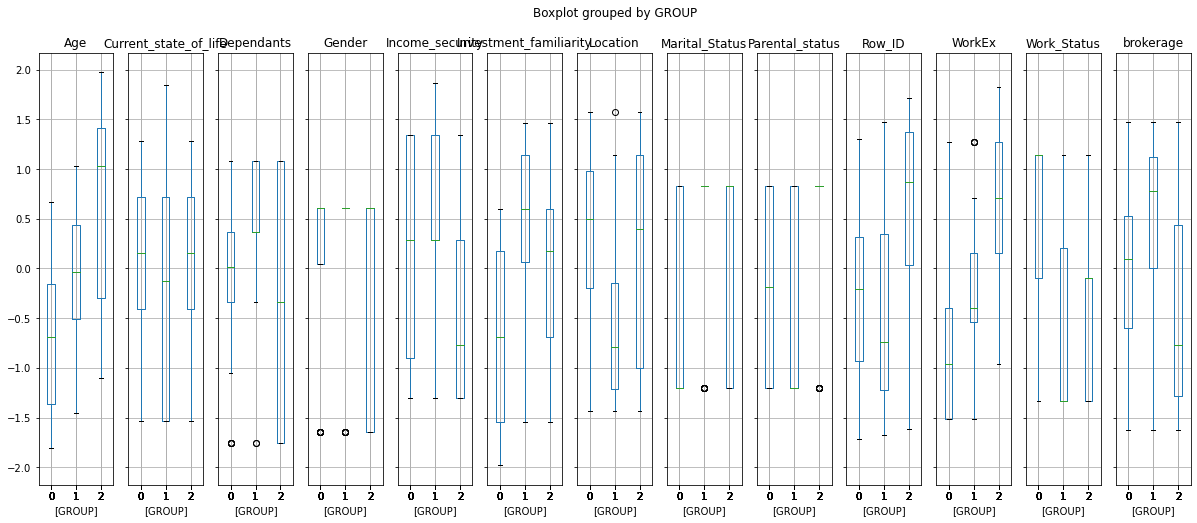

In [16]:
attr_scaled.boxplot(by='GROUP',layout =(1,13),figsize=(20,8))

In [23]:
group0=attributes[attributes['GROUP']==0]
group1=attributes[attributes['GROUP']==1]
group2=attributes[attributes['GROUP']==2]

###**GROUP 0**###

In [24]:
group0.head()

,Row_ID,WorkEx,Age,Gender,Location,Work_Status,Marital_Status,Parental_status,Dependants,Income_security,Investment_familiarity,Current_state_of_life,brokerage,GROUP
0,0,1,11,1,11,1,1,1,1,0,0,3,4,0
5,5,5,5,1,13,2,0,1,0,3,5,4,0,0
10,10,0,2,1,8,0,0,1,4,3,3,5,6,0
11,11,2,14,1,10,1,0,1,4,1,5,2,6,0
13,13,1,10,1,14,1,1,1,3,1,3,3,4,0


###**GROUP 1**###

In [25]:
group1.head()

,Row_ID,WorkEx,Age,Gender,Location,Work_Status,Marital_Status,Parental_status,Dependants,Income_security,Investment_familiarity,Current_state_of_life,brokerage,GROUP
1,1,2,14,1,9,0,1,1,2,6,7,0,8,1
2,2,5,9,1,1,0,0,0,3,4,4,6,7,1
4,4,2,14,1,0,0,1,0,4,5,6,1,5,1
6,6,3,20,1,12,0,1,1,4,5,8,0,2,1
7,7,3,20,1,6,2,1,0,3,5,5,5,7,1


In [26]:
group2.head()

,Row_ID,WorkEx,Age,Gender,Location,Work_Status,Marital_Status,Parental_status,Dependants,Income_security,Investment_familiarity,Current_state_of_life,brokerage,GROUP
3,3,3,27,1,2,0,0,0,0,2,2,2,1,2
21,21,5,8,1,12,0,1,1,2,0,6,4,7,2
33,33,3,32,0,8,0,0,1,2,1,3,0,2,2
34,34,5,19,1,12,1,1,1,0,0,6,0,7,2
36,36,4,31,1,4,0,0,1,0,1,8,5,9,2




###**Combining all the groups together**###

In [27]:
clustered_df=pd.concat([group0,group1,group2])
clustered_df

,Row_ID,WorkEx,Age,Gender,Location,Work_Status,Marital_Status,Parental_status,Dependants,Income_security,Investment_familiarity,Current_state_of_life,brokerage,GROUP
0,0,1,11,1,11,1,1,1,1,0,0,3,4,0
5,5,5,5,1,13,2,0,1,0,3,5,4,0,0
10,10,0,2,1,8,0,0,1,4,3,3,5,6,0
11,11,2,14,1,10,1,0,1,4,1,5,2,6,0
13,13,1,10,1,14,1,1,1,3,1,3,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,4,27,0,13,2,0,1,4,0,1,2,2,2
96,96,5,10,1,2,0,1,1,0,5,1,5,4,2
97,97,5,6,1,1,1,1,1,3,1,6,5,8,2
98,98,4,29,1,2,2,1,1,2,3,3,3,1,2


###**Merging the needs / survey parameters into the dataframe**###

In [28]:
grouped_data=pd.merge(clustered_df, survey_params, how='inner', on = 'Row_ID')
grouped_data

,Row_ID,WorkEx,Age,Gender,Location,Work_Status,Marital_Status,Parental_status,Dependants,Income_security,...,N8_3,N9_1,N9_2,N9_3,N10_1,N10_2,N10_3,N11_1,N11_2,N11_3
0,0,1,11,1,11,1,1,1,1,0,...,high,very high,medium,high,high,high,low,medium,medium,low
1,5,5,5,1,13,2,0,1,0,3,...,not applicable,high,very high,low,low,not applicable,not applicable,high,medium,medium
2,10,0,2,1,8,0,0,1,4,3,...,very high,very high,very high,not applicable,very high,medium,high,very high,high,medium
3,11,2,14,1,10,1,0,1,4,1,...,high,high,high,high,low,low,low,high,low,very high
4,13,1,10,1,14,1,1,1,3,1,...,low,very high,very high,low,high,medium,medium,high,medium,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,4,27,0,13,2,0,1,4,0,...,very high,very high,low,not applicable,high,not applicable,not applicable,not applicable,not applicable,low
96,96,5,10,1,2,0,1,1,0,5,...,somewhat high(medium),not applicable,not applicable,high,somewhat high(medium),high,somewhat high(medium),low,very high,not applicable
97,97,5,6,1,1,1,1,1,3,1,...,very high,high,not applicable,very high,low,very high,high,not applicable,low,very high
98,98,4,29,1,2,2,1,1,2,3,...,not applicable,not applicable,high,not applicable,somewhat high(medium),very high,low,high,high,high


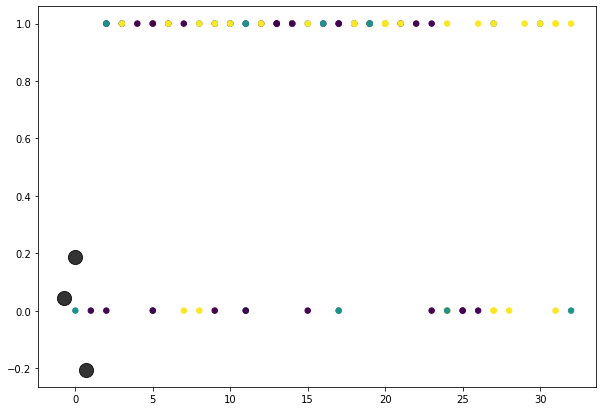

In [29]:
from pandas.core.groupby.groupby import group_selection_context
plt.figure(figsize = [10, 7], clear = False)

clusters = model.labels_
centers = model.cluster_centers_

plt.scatter(grouped_data.iloc[:, 2],
            grouped_data.iloc[:, 3],
            c = clusters,
            s = 30,
            cmap = "viridis")

plt.scatter(centers[:, 2],
           centers[:, 3],
           c = "black",
           s = 200,
           alpha = 0.8);

###**Function for computing needs mectrics :**###
---
####***Importance***####
####***Satisfaction***####
####***Effort***####



In [30]:
def compute_need_metrics(df,need_id):
  
  very_high_1 = df[df[f'N{need_id}_1'] == "very high"]['Row_ID'].count()
  high_1=df[df[f'N{need_id}_1'] == "high"]['Row_ID'].count()
  
  very_high_2 = df[df[f'N{need_id}_2'] == "very high"]['Row_ID'].count()
  high_2=df[df[f'N{need_id}_2'] == "high"]['Row_ID'].count()

  very_high_3 = df[df[f'N{need_id}_3'] == "very high"]['Row_ID'].count()  
  high_3 = df[df[f'N{need_id}_3'] == "high"]['Row_ID'].count()

  importance  =(very_high_1+high_1)/len(df)
  satisfaction=(very_high_2+high_2)/len(df)
  effort      =(very_high_3+high_3)/len(df)

  return importance,satisfaction,effort

###Defining Empty database###

In [31]:
need_matrix=pd.DataFrame(columns=['Need','Importance','Satisfaction','Effort']) 

###**Computing Need Matrix**###

In [32]:
def calclate_need_matrix(df):
  for i in range(1,12):
      x=x=compute_need_metrics(df,i)
      need_matrix.loc[i,'Need']=i
      need_matrix.loc[i,'Importance']=x[0]
      need_matrix.loc[i,'Satisfaction']=x[1]
      need_matrix.loc[i,'Effort']=x[2]

  return need_matrix

###**Needs Sorted based on importance: *GROUP 0***###

In [33]:
need_matrix_0=calclate_need_matrix(grouped_data[grouped_data['GROUP']==0])
need_matrix_0.sort_values(['Importance'],ascending=False)

,Need,Importance,Satisfaction,Effort
1,1,0.625,0.53125,0.375
5,5,0.5625,0.5625,0.5
11,11,0.5625,0.28125,0.375
2,2,0.53125,0.46875,0.40625
3,3,0.5,0.40625,0.4375
9,9,0.5,0.53125,0.375
7,7,0.46875,0.4375,0.34375
4,4,0.4375,0.53125,0.4375
6,6,0.4375,0.1875,0.59375
10,10,0.28125,0.40625,0.375


###**Needs Sorted based on importance: *GROUP 1***###

In [36]:
need_matrix_1=calclate_need_matrix(grouped_data[grouped_data['GROUP']==1])
need_matrix_1.sort_values('Importance',ascending=False)


,Need,Importance,Satisfaction,Effort
2,2,0.65625,0.46875,0.34375
9,9,0.625,0.625,0.4375
11,11,0.625,0.46875,0.46875
7,7,0.59375,0.4375,0.46875
10,10,0.59375,0.53125,0.46875
1,1,0.5625,0.46875,0.34375
3,3,0.5625,0.15625,0.46875
5,5,0.53125,0.46875,0.4375
4,4,0.4375,0.34375,0.375
6,6,0.3125,0.34375,0.375


####**Needs Sorted Based on importance GROUP2**####

In [37]:
need_matrix_2=calclate_need_matrix(grouped_data[grouped_data['GROUP']==2])
need_matrix_2.sort_values('Importance',ascending=False)

,Need,Importance,Satisfaction,Effort
1,1,0.527778,0.5,0.25
4,4,0.472222,0.416667,0.388889
3,3,0.444444,0.472222,0.361111
10,10,0.444444,0.444444,0.305556
7,7,0.416667,0.361111,0.416667
9,9,0.416667,0.25,0.388889
6,6,0.361111,0.25,0.444444
8,8,0.361111,0.361111,0.555556
2,2,0.333333,0.638889,0.388889
11,11,0.333333,0.361111,0.222222


###**will be adding Need based clustering soon and this notebook will be updated**###

###***Defining Need Magnitudes***###

####**GROUP0**####

In [119]:
need_magnitude = pd.DataFrame(((need_matrix_0['Importance']**2 + need_matrix_0['Satisfaction']**2 + need_matrix_0['Effort']**2)**0.5))
need_magnitude.transpose()

,1,2,3,4,5,6,7,8,9,10,11
0,0.768797,0.818856,0.742244,0.740162,0.725952,0.624846,0.691103,0.754615,0.622371,0.698875,0.539347


In [120]:
def Score(input):
  satisfaction=[]
  for i in range(len(input)):
    if input[i] == 'very high':
      satisfaction.append(5)
    elif input[i] == 'high':
      satisfaction.append(4)
    elif input[i] == 'medium':
      satisfaction.append(2)
    elif input[i] == 'somewhat high(medium)':
      satisfaction.append(2)
    elif input[i] == 'low':
      satisfaction.append(1)
    elif input[i] == 'not applicable':
      satisfaction.append(0)

  return satisfaction

In [135]:
need_id=1
NEED_DATA = grouped_data[['Row_ID',f'N{need_id}_1',f'N{need_id}_2',f'N{need_id}_3','GROUP']]

NEED_DATA['satisfaction']=Score(NEED_DATA[f'N{need_id}_2'])
NEED_DATA['Importance']=Score(NEED_DATA[f'N{need_id}_1'])
NEED_DATA['Effort']=Score(NEED_DATA[f'N{need_id}_3'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [136]:
NEED_DATA

,Row_ID,N1_1,N1_2,N1_3,GROUP,satisfaction,Importance,Effort
0,0,very high,very high,very high,0,5,5,5
1,5,very high,medium,medium,0,2,5,2
2,10,very high,very high,not applicable,0,5,5,0
3,11,medium,medium,high,0,2,2,4
4,13,very high,high,low,0,4,5,1
...,...,...,...,...,...,...,...,...
95,95,very high,not applicable,high,2,0,5,4
96,96,somewhat high(medium),very high,very high,2,5,2,5
97,97,very high,high,low,2,4,5,1
98,98,not applicable,not applicable,high,2,0,0,4


In [145]:
factor=need_magnitude[0].iloc[need_id-1]
imp_vs_sat = NEED_DATA.copy()
imp_vs_sat['Importance_scaled']= imp_vs_sat['Importance']*factor/(imp_vs_sat['Importance']**2 + imp_vs_sat['satisfaction']**2 +imp_vs_sat['Effort']**2)**0.5
imp_vs_sat['Satisfaction_scaled']= imp_vs_sat['satisfaction']*factor/(imp_vs_sat['Importance']**2 + imp_vs_sat['satisfaction']**2 +imp_vs_sat['Effort']**2)**0.5
imp_vs_sat['Effort_scaled']= imp_vs_sat['Effort']*factor/(imp_vs_sat['Importance']**2 + imp_vs_sat['satisfaction']**2 +imp_vs_sat['Effort']**2)**0.5

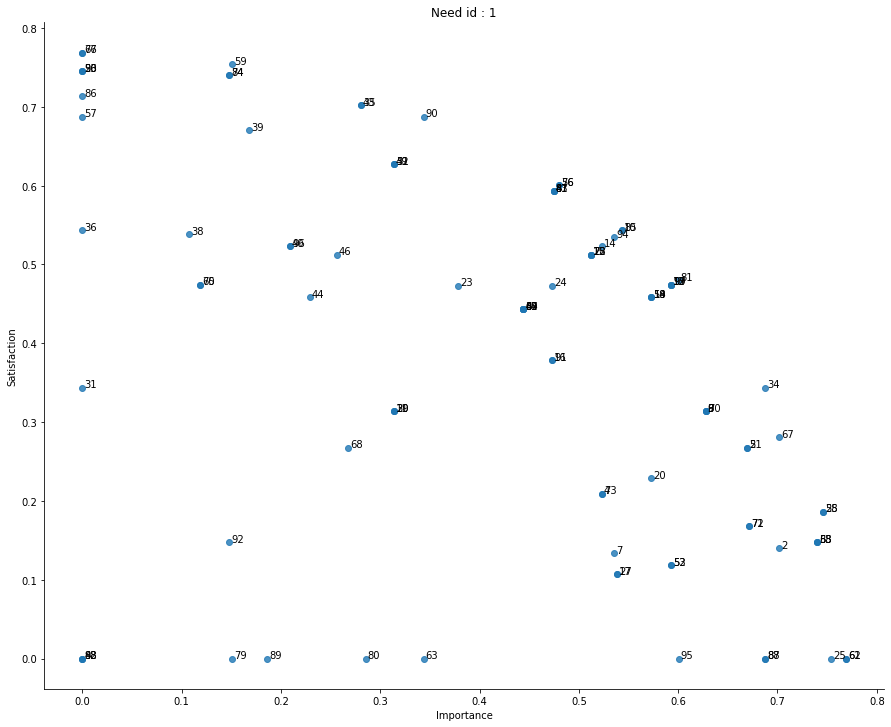

In [146]:
ax = sns.lmplot(x='Importance_scaled', # Horizontal axis
           y='Satisfaction_scaled', # Vertical axis
           data=imp_vs_sat, # Data source
           fit_reg=False, # Don't fix a regression line
           height = 10,
           aspect =1.25 ) # size and dimension

plt.title(f'Need id : {need_id}')
# Set x-axis label
plt.xlabel('Importance')
# Set y-axis label
plt.ylabel('Satisfaction')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.002, point['y'], str(int(point['val'])))

label_point(imp_vs_sat.Importance_scaled, imp_vs_sat.Satisfaction_scaled, imp_vs_sat.Row_ID, plt.gca())

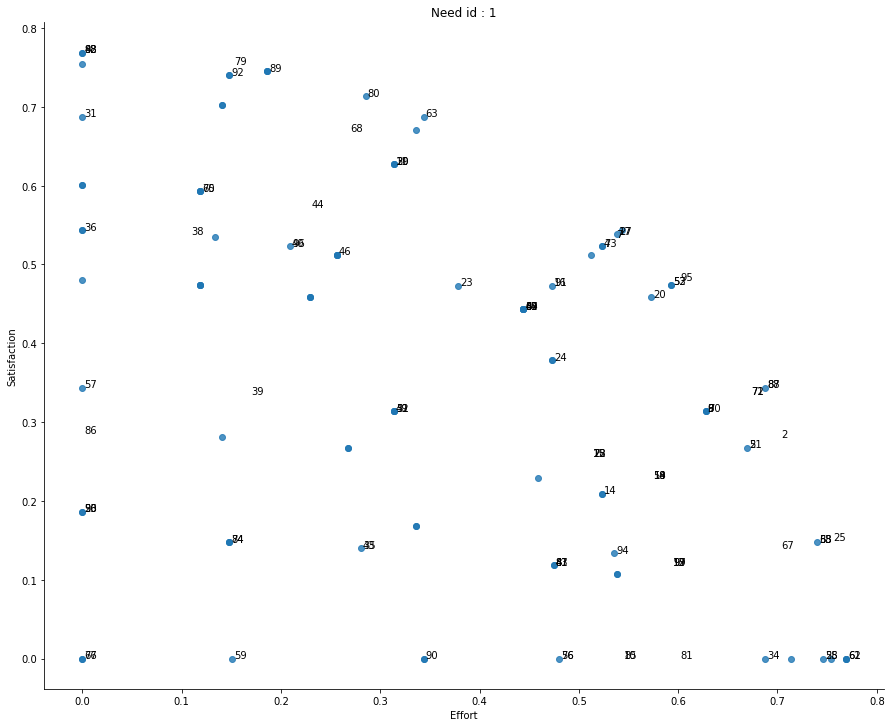

In [148]:
ax = sns.lmplot(x='Effort_scaled', # Horizontal axis
           y='Satisfaction_scaled', # Vertical axis
           data=imp_vs_sat, # Data source
           fit_reg=False, # Don't fix a regression line
           height = 10,
           aspect =1.25 ) # size and dimension

plt.title(f'Need id : {need_id}')
# Set x-axis label
plt.xlabel('Effort')
# Set y-axis label
plt.ylabel('Satisfaction')

label_point(imp_vs_sat.Importance_scaled, imp_vs_sat.Effort_scaled, imp_vs_sat.Row_ID, plt.gca())


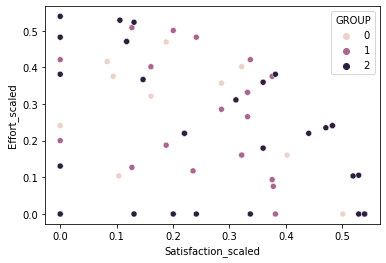

In [111]:
sns.scatterplot(data=imp_vs_sat,x="Satisfaction_scaled",y="Effort_scaled",hue='GROUP')

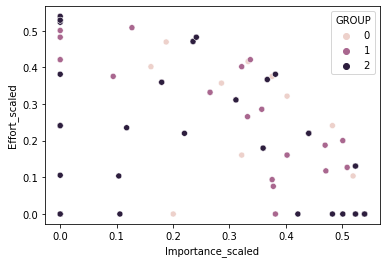

In [112]:
sns.scatterplot(data=imp_vs_sat, x="Importance_scaled", y="Effort_scaled",hue='GROUP')